## Basic  Preparation for MIMIC-III Dataset for Discharge Codes Longitudinal Predictions Task

### Main Preparation Steps

1. Load dataframes from the downloaded dataset from Physionet.
2. Select patients with at least two admissions (i.e. for sequential prediction task).
3. Map subjects to single ethnicity in admissions.
4. Export three tables to the cohort directory:
    1. `adm_df.csv.gz`: for admission information.
    2. `static_df.csv.gz`: for demographic information (DoB, ethnicity, gender).
    3. `dx_df.csv.gz`: for discharge codes information linked to each admission.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Set the raw dataset directory (folder) absolute path.
mimic_dir = '/home/asem/GP/ehr-data/physionet.org/files/mimiciii/1.4'

# Set the target cohort directory.
cohort_dir = '/home/asem/GP/ehr-data/mimic3-cohort'
Path(cohort_dir).mkdir(parents=True, exist_ok=True)


In [3]:
adm_df = pd.read_csv(f'{mimic_dir}/ADMISSIONS.csv.gz')

In [4]:
adm_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [5]:
f'#subjects: {len(set(adm_df.SUBJECT_ID))}'

'#subjects: 46520'

<AxesSubplot:>

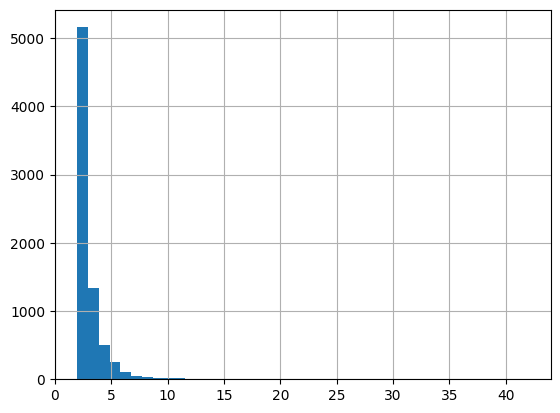

In [6]:
patients_n_admission = adm_df.groupby('SUBJECT_ID').size()
patients_n_admission[patients_n_admission > 1].hist(bins=patients_n_admission.max())

In [7]:
# In GRAM paper, all patients with at least 2 visits were utilized (n=7537).
f'#subjects (n_admissions> 1): {len(patients_n_admission[patients_n_admission > 1])}'

'#subjects (n_admissions> 1): 7537'

#### Filter qualified subjects

In [8]:
qualified_subjects = patients_n_admission[patients_n_admission > 1].index
adm_df = adm_df[adm_df.SUBJECT_ID.isin(qualified_subjects)]

In [9]:
adm_df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
12,33,34,115799,2186-07-18 16:46:00,2186-07-20 16:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,CHEST PAIN\CATH,0,1
13,34,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2191-02-23 04:23:00,2191-02-23 07:25:00,BRADYCARDIA,0,1
15,36,36,182104,2131-04-30 07:15:00,2131-05-08 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58962,58585,98761,184477,2186-01-16 10:30:00,2186-01-16 16:30:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,GASTROPARESIS\PLACEMENT OF G-TUBE **REMOTE WES...,0,0
58963,58586,98761,182540,2186-02-08 12:30:00,2186-02-08 20:21:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,SHORT GUT SYNDROME/SDA,0,0
58964,58587,98761,175884,2189-07-10 18:08:00,2189-07-17 14:57:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2189-07-10 14:46:00,2189-07-10 20:28:00,DEHYDRATION,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [10]:
def map_ethnicity(subj_df):
    
    def resolution(series):
        # Return the more detailed ethnicity (longer string)
        idx = series.apply(lambda s: len(s)).idxmax()
        return series.loc[idx]
    
    eth_df = subj_df['ETHNICITY']
    eth_df = eth_df[~eth_df.str.contains('UNKNOWN')]
    eth_df = eth_df[~eth_df.str.contains('UNABLE')]
    eth_df = eth_df[~eth_df.str.contains('DECLINED')]
    ethnicity_set = set(eth_df)
    
    if len(ethnicity_set) == 0:
        return 'UNKNOWN'
    if len(ethnicity_set) == 1:
        (ethnicity,) = ethnicity_set
        return ethnicity
    
    if eth_df.str.contains('WHITE').all():
        return resolution(eth_df)
    if eth_df.str.contains('ASIAN').all():
        return resolution(eth_df)
    if eth_df.str.contains('HISPANIC').all():
        return resolution(eth_df)
    if len(ethnicity_set) > 1:
        print(f'Unresolved (return "UNKNOWN"): {ethnicity_set}')
    
    return 'UNKNOWN'

subject_eth_df = adm_df.groupby('SUBJECT_ID').apply(map_ethnicity)

Unresolved (return "UNKNOWN"): {'OTHER', 'BLACK/AFRICAN'}
Unresolved (return "UNKNOWN"): {'WHITE', 'OTHER'}
Unresolved (return "UNKNOWN"): {'BLACK/HAITIAN', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'WHITE', 'OTHER'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'OTHER'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'OTHER'}
Unresolved (return "UNKNOWN"): {'WHITE', 'OTHER'}
Unresolved (return "UNKNOWN"): {'BLACK/AFRICAN AMERICAN', 'OTHER'}
Unresolved (return "UNKNOWN"): {'WHITE', 'OTHER'}
Unresolved (return "UNKNOWN"): {'WHITE', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'WHITE', 'OTHER'}
Unresolved (return "UNKNOWN"): {'WHITE', 'OTHER'}
Unresolved (return "UNKNOWN"): {'WHITE', 'HISPANIC/LATINO - GUATEMALAN'}
Unresolved (return "UNKNOWN"): {'MULTI RACE ETHNICITY', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'WHITE', 'OTHER'}
Unresolved (return "UNKNOWN"): {'OTHER', 'PORTUGUESE'}
Unresolved (return "UNKNOWN"): {'BLACK/

In [11]:
patients_df = pd.read_csv(f'{mimic_dir}/PATIENTS.csv.gz')
patients_df = patients_df[patients_df.SUBJECT_ID.isin(qualified_subjects)].reset_index(drop=True)
patients_df['ETHNICITY'] = patients_df.SUBJECT_ID.map(subject_eth_df)
patients_df = patients_df[['SUBJECT_ID', 'GENDER', 'DOB', 'ETHNICITY']]
patients_df.to_csv(f'{cohort_dir}/static_df.csv.gz', compression='gzip', index=False)

In [12]:
patients_df = pd.read_csv(f'{cohort_dir}/static_df.csv.gz')
patients_df.head()

,SUBJECT_ID,GENDER,DOB,ETHNICITY
0,249,F,2075-03-13 00:00:00,WHITE
1,252,M,2078-03-06 00:00:00,WHITE
2,256,M,2086-07-31 00:00:00,WHITE
3,665,M,2052-05-20 00:00:00,BLACK/AFRICAN AMERICAN
4,674,F,2113-12-14 00:00:00,WHITE


In [13]:
adm_df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
12,33,34,115799,2186-07-18 16:46:00,2186-07-20 16:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,CHEST PAIN\CATH,0,1
13,34,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2191-02-23 04:23:00,2191-02-23 07:25:00,BRADYCARDIA,0,1
15,36,36,182104,2131-04-30 07:15:00,2131-05-08 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58962,58585,98761,184477,2186-01-16 10:30:00,2186-01-16 16:30:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,GASTROPARESIS\PLACEMENT OF G-TUBE **REMOTE WES...,0,0
58963,58586,98761,182540,2186-02-08 12:30:00,2186-02-08 20:21:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,SHORT GUT SYNDROME/SDA,0,0
58964,58587,98761,175884,2189-07-10 18:08:00,2189-07-17 14:57:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2189-07-10 14:46:00,2189-07-10 20:28:00,DEHYDRATION,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [14]:
adm_df = adm_df[['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME']]
adm_df.to_csv(f'{cohort_dir}/adm_df.csv.gz', compression='gzip', index=False)


In [15]:
dx_df = pd.read_csv(f'{mimic_dir}/DIAGNOSES_ICD.csv.gz', dtype = {'ICD9_CODE': str})
dx_df = dx_df[dx_df.ICD9_CODE.notnull()].reset_index(drop=True)
dx_df = dx_df[dx_df.SUBJECT_ID.isin(qualified_subjects)].reset_index(drop=True)
dx_df = dx_df[['HADM_ID', 'ICD9_CODE']]
dx_df.to_csv(f'{cohort_dir}/dx_df.csv.gz', compression='gzip', index=False)